## q4

In [40]:
import numpy as np

input_true=np.array([1,0,1,0,0,1,1,1,0,0])
input_pred=np.array([0.98,0.92,0.85,0.77,0.71,0.64,0.5,0.39,0.34,0.31])

P=np.count_nonzero(input_true==1)
N=np.count_nonzero(input_true==0)

def get_data(thred):
    positive=0
    false_positive=0
    correct=0
    for i in range(10):
        if input_pred[i]>=thred:
            positive+=1
            if input_true[i]==1:
                correct+=1
            else:
                false_positive+=1
        else:
            if input_true[i]==0:
                correct+=1
    return positive,false_positive,correct

data_array=[get_data(thred) for thred in input_pred]
print("| thred TPR   FPR   ACC   |")
print("|-------------------------|")
for i in range(10):
    current_data=data_array[i]
    tpr=(current_data[0]-current_data[1])/P
    fpr=current_data[1]/N
    acc=current_data[2]/10
    print(f"| {input_pred[i]:.3f} {tpr:.3f} {fpr:.3f} {acc:.3f} |")

| thred TPR   FPR   ACC   |
|-------------------------|
| 0.980 0.200 0.000 0.600 |
| 0.920 0.200 0.200 0.500 |
| 0.850 0.400 0.200 0.600 |
| 0.770 0.400 0.400 0.500 |
| 0.710 0.400 0.600 0.400 |
| 0.640 0.600 0.600 0.500 |
| 0.500 0.800 0.600 0.600 |
| 0.390 1.000 0.600 0.700 |
| 0.340 1.000 0.800 0.600 |
| 0.310 1.000 1.000 0.500 |


## 5.Draw the ROC curve

[Text(0.5, 0, 'FPR'), Text(0, 0.5, 'TPR'), Text(0.5, 1.0, 'ROC figure')]

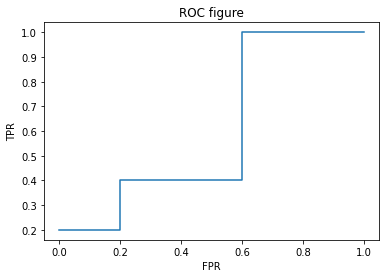

In [41]:
roc_curve=[[data[1]/N,(data[0]-data[1])/P] for data in data_array]
roc_curve=np.array(roc_curve)
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.plot(roc_curve[:,0],roc_curve[:,1])
ax.set(xlabel="FPR",ylabel="TPR",title="ROC figure")

## 6.a

In [42]:
import pandas as pd
q6_data=pd.read_csv("spam.csv")
q6_data=q6_data.drop(["isuid","id","domain","spampct","category","cappct"],axis=1)
print(f"{q6_data}")

     day of week  time of day  size.kb  box local  digits    name  special  \
0            Thu            0        7   no    no       0    name        1   
1            Thu            0        2   no    no       0    name        5   
2            Thu           14        3   no   yes       0    name        2   
3            Thu            3        3  yes    no       0    name        0   
4            Thu            3        4   no    no       0    name        2   
...          ...          ...      ...  ...   ...     ...     ...      ...   
2166         Fri           10        5   no    no       0  single        1   
2167         Sun           15      192  yes    no       0    name        0   
2168         Sun           15       85  yes    no       0    name        0   
2169         Tue           13        4  yes    no       0    name        0   
2170         Tue            9        1  yes   yes       0    name        1   

     credit sucker porn chain username large text spam  
0     

## 6.b.i

In [43]:
num_of_spam=q6_data["spam"]=="yes"
print("the fraction of spam:")
print(num_of_spam.sum()/len(num_of_spam))

the fraction of spam:
0.327038231229848


## 6.b.ii
the constant classifier should predict false, that is not spam.

## 6.b.iii
the error rate should be:

In [44]:
print(num_of_spam.sum()/len(num_of_spam))

0.327038231229848


## 6.c

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
enc.fit(q6_data)
q6data_trans=enc.transform(q6_data)
train,test=train_test_split(q6data_trans,test_size=0.2,random_state=124)

print(q6data_trans)
print(train)
print(test)

[[ 4.  0.  7. ...  0.  0.  0.]
 [ 4.  0.  2. ...  0.  0.  1.]
 [ 4. 14.  3. ...  0.  0.  0.]
 ...
 [ 3. 15. 66. ...  0.  0.  0.]
 [ 5. 13.  4. ...  0.  0.  0.]
 [ 5.  9.  1. ...  0.  0.  0.]]
[[ 0.  6.  9. ...  0.  1.  1.]
 [ 5.  3.  3. ...  0.  0.  0.]
 [ 6.  6.  5. ...  0.  1.  1.]
 ...
 [ 6. 20.  6. ...  0.  1.  1.]
 [ 6. 11.  1. ...  0.  0.  0.]
 [ 6. 13.  7. ...  0.  1.  1.]]
[[ 4. 17.  3. ...  0.  0.  0.]
 [ 4. 17.  3. ...  0.  0.  0.]
 [ 0. 15.  2. ...  0.  0.  0.]
 ...
 [ 5.  2.  1. ...  0.  1.  1.]
 [ 1. 14.  0. ...  0.  0.  0.]
 [ 0. 10.  2. ...  0.  0.  0.]]


## 6.d

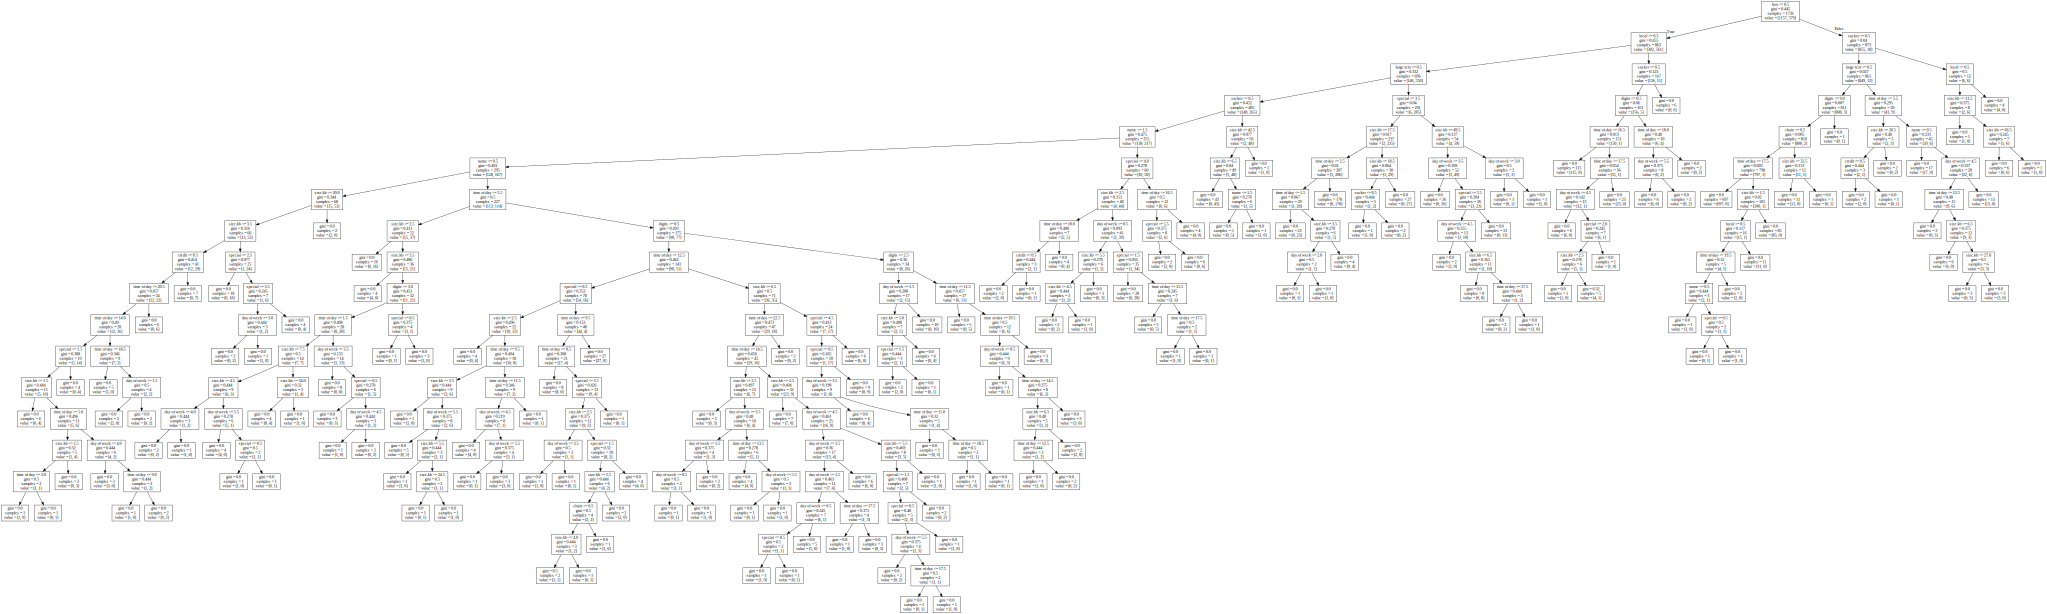

In [46]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

clf=DecisionTreeClassifier()

clf.fit(train[:,:-1],train[:,-1])
graph=export_graphviz(clf,feature_names=q6_data.columns[:-1])
from graphviz import Source
Source(graph)

## 6.e
GINI

## 6.f

In [47]:
train_pred=clf.predict(train[:,:-1])
test_pred=clf.predict(test[:,:-1])

from sklearn import metrics

train_report=metrics.classification_report(train[:,-1],train_pred,output_dict=True)
test_report=metrics.classification_report(test[:,-1],test_pred,output_dict=True)

train_accuracy=train_report['accuracy']
train_sens=train_report['1.0']['recall']
train_spec=train_report['0.0']['recall']

test_accuracy=test_report['accuracy']
test_sens=test_report['1.0']['recall']
test_spec=test_report['0.0']['recall']

print(f"before the pruning:tree nodes:{clf.tree_.node_count},tree depth:{clf.tree_.max_depth}")

print(f"for training data: acc:{train_accuracy:.3f},sensitivity:{train_sens:.3f},specificity:{train_spec:.3f}")
print(f"for testing data: acc:{test_accuracy:.3f},sensitivity:{test_sens:.3f},specificity:{test_spec:.3f}")


before the pruning:tree nodes:313,tree depth:19
for training data: acc:0.999,sensitivity:0.997,specificity:1.000
for testing data: acc:0.906,sensitivity:0.794,specificity:0.954


## 6.g

In [48]:
new_clf=DecisionTreeClassifier()
path=new_clf.cost_complexity_pruning_path(train[:,:-1],train[:,-1])
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [49]:
new_clfs = []
X_train=train[:,:-1]
y_train=train[:,-1]
for ccp_alpha in ccp_alphas:
    new_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    new_clf.fit(X_train, y_train)
    new_clfs.append(new_clf)

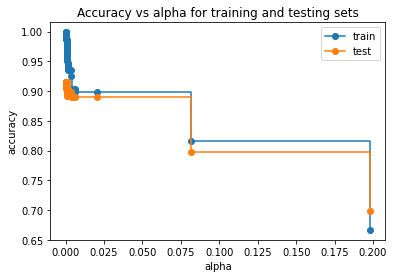

In [50]:
X_test=test[:,:-1]
y_test=test[:,-1]
train_scores = [new_clf.score(X_train, y_train) for new_clf in new_clfs]
test_scores = [new_clf.score(X_test, y_test) for new_clf in new_clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

according to the graph above, we decide to choose the 24th tree, which have the highest test accuracy


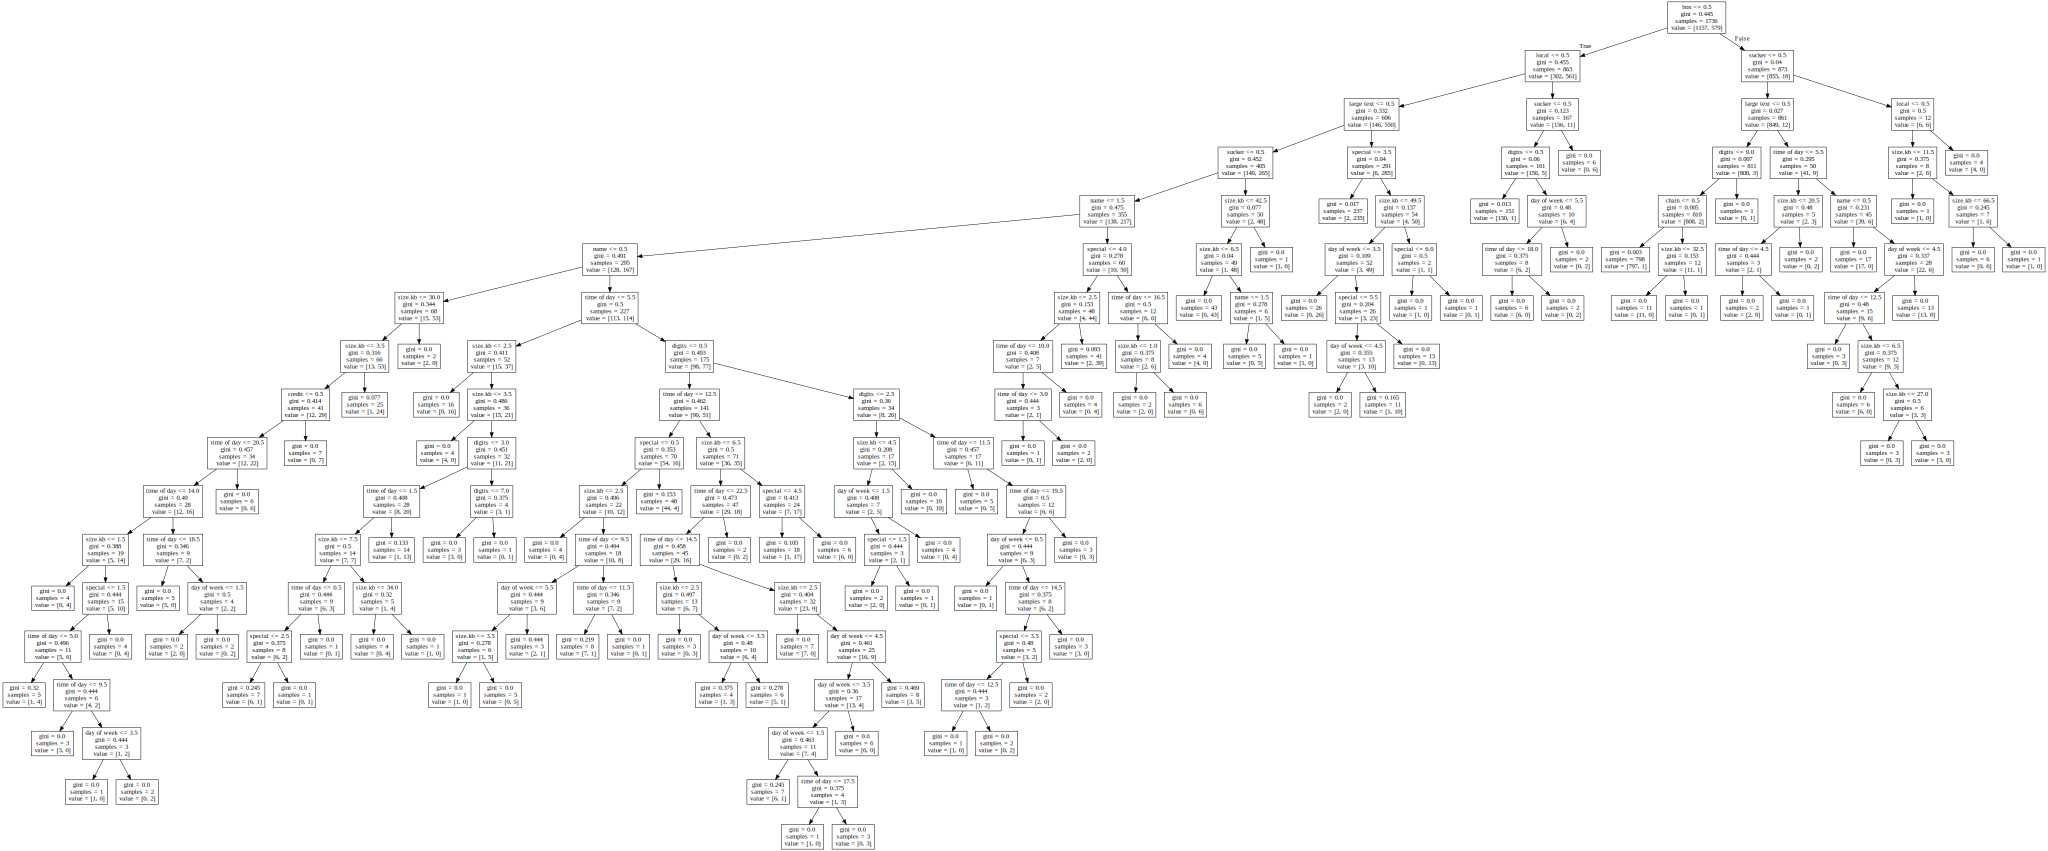

In [51]:
print("according to the graph above, we decide to choose the 24th tree, which have the highest test accuracy")
tree=new_clfs[23]

graph=export_graphviz(tree,feature_names=q6_data.columns[:-1])

from graphviz import Source
Source(graph)

In [52]:
train_pred=tree.predict(X_train)
test_pred=tree.predict(X_test)
train_report=metrics.classification_report(train[:,-1],train_pred,output_dict=True)
test_report=metrics.classification_report(test[:,-1],test_pred,output_dict=True)

train_accuracy=train_report['accuracy']
train_sens=train_report['1.0']['recall']
train_spec=train_report['0.0']['recall']

test_accuracy=test_report['accuracy']
test_sens=test_report['1.0']['recall']
test_spec=test_report['0.0']['recall']
print(f"after the pruning:tree nodes:{tree.tree_.node_count},tree depth:{tree.tree_.max_depth}")
print(f"the node reduced from {clf.tree_.node_count} to {tree.tree_.node_count} , the max depth reduced from {clf.tree_.max_depth} to {tree.tree_.max_depth}")
print(f"for training data: acc:{train_accuracy:.3f},sensitivity:{train_sens:.3f},specificity:{train_spec:.3f}")
print(f"for testing data: acc:{test_accuracy:.3f},sensitivity:{test_sens:.3f},specificity:{test_spec:.3f}")

after the pruning:tree nodes:185,tree depth:17
the node reduced from 313 to 185 , the max depth reduced from 19 to 17
for training data: acc:0.986,sensitivity:0.981,specificity:0.989
for testing data: acc:0.915,sensitivity:0.847,specificity:0.944


## Q7.a

In [53]:
from sklearn.model_selection import KFold
training_sets=[]
testing_sets=[]

fold=KFold(10)
for train_index,test_index in fold.split(q6data_trans):
    training_sets.append(train_index)
    testing_sets.append(test_index)

print(training_sets)

[array([ 218,  219,  220, ..., 2168, 2169, 2170]), array([   0,    1,    2, ..., 2168, 2169, 2170]), array([   0,    1,    2, ..., 2168, 2169, 2170]), array([   0,    1,    2, ..., 2168, 2169, 2170]), array([   0,    1,    2, ..., 2168, 2169, 2170]), array([   0,    1,    2, ..., 2168, 2169, 2170]), array([   0,    1,    2, ..., 2168, 2169, 2170]), array([   0,    1,    2, ..., 2168, 2169, 2170]), array([   0,    1,    2, ..., 2168, 2169, 2170]), array([   0,    1,    2, ..., 1951, 1952, 1953])]


## Q7.b

In [54]:
model_names=["knn-3","knn-7","knn-11","knn-15",
"tree1",
"tree2",
"bayes"]
all_acc=[]
all_sens=[]
all_spec=[]

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

for train_index,test_index in zip(training_sets,testing_sets):
    #first build the model and trainning
    X_train=q6data_trans[train_index][:,:-1]
    y_train=q6data_trans[train_index][:,-1]
    X_test=q6data_trans[test_index][:,:-1]
    y_test=q6data_trans[test_index][:,-1]
    knn_models=[KNeighborsClassifier(n) for n in (3,7,11,15) ]
    for knn_m in knn_models:
        knn_m.fit(X_train,y_train)

    #create 2 trees with different pruning amount
    tree1=DecisionTreeClassifier()
    path=tree1.cost_complexity_pruning_path(train[:,:-1],train[:,-1])
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    tree1 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alphas[10])
    tree1.fit(X_train, y_train)


    tree2=DecisionTreeClassifier()
    path=tree2.cost_complexity_pruning_path(train[:,:-1],train[:,-1])
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    tree2 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alphas[20])
    tree2.fit(X_train, y_train)

    #create the naiveBayes
    bayes=GaussianNB()
    bayes.fit(X_train,y_train)

    #second , test the model
    models=[]
    models.extend(knn_models)
    models.extend([tree1,tree2,bayes])
    #metrcs for each models in this fold
    this_acc=[]
    this_sens=[]
    this_spec=[]
    for i,model in enumerate(models):
        #test
        result=model.predict(X_test)
        report=metrics.classification_report(y_test,result,output_dict=True)
        acc=report['accuracy']
        sens=report['1.0']['recall']
        spec=report['0.0']['recall']
        this_acc.append(acc)
        this_spec.append(spec)
        this_sens.append(sens)
    all_acc.append(this_acc)
    all_sens.append(this_sens)
    all_spec.append(this_spec)

In [55]:
all_acc=np.array(all_acc)
all_sens=np.array(all_sens)
all_spec=np.array(all_spec)
print("\ntitle: the accuracy for each fold and each model")
print("fold   knn-3  knn-7  knn-11 knn-15 tree-1 tree-2 bayes")
for i in range(10):
    print(f"{i+1:2}     ",end="")
    for m in range(7):
        print(f"{all_acc[i][m]:.3f}  ",end="")
    print("")

print("\ntitle: the sensitivity for each fold and each model")
print("fold   knn-3  knn-7  knn-11 knn-15 tree-1 tree-2 bayes")
for i in range(10):
    print(f"{i+1:2}     ",end="")
    for m in range(7):
        print(f"{all_sens[i][m]:.3f}  ",end="")
    print("")

print("\ntitle: the specificity for each fold and each model")
print("fold   knn-3  knn-7  knn-11 knn-15 tree-1 tree-2 bayes")
for i in range(10):
    print(f"{i+1:2}     ",end="")
    for m in range(7):
        print(f"{all_spec[i][m]:.3f}  ",end="")
    print("")


title: the accuracy for each fold and each model
fold   knn-3  knn-7  knn-11 knn-15 tree-1 tree-2 bayes
 1     0.766  0.803  0.803  0.766  0.752  0.748  0.954  
 2     0.839  0.862  0.839  0.866  0.885  0.917  0.820  
 3     0.783  0.793  0.797  0.793  0.903  0.908  0.899  
 4     0.876  0.820  0.802  0.797  1.000  1.000  0.935  
 5     0.866  0.880  0.862  0.880  0.935  0.945  0.935  
 6     0.866  0.825  0.816  0.797  0.963  0.963  0.940  
 7     0.806  0.839  0.829  0.806  0.889  0.889  0.880  
 8     0.802  0.774  0.770  0.760  0.880  0.912  0.862  
 9     0.668  0.654  0.636  0.627  0.880  0.894  0.834  
10     0.751  0.751  0.747  0.733  0.834  0.834  0.779  

title: the sensitivity for each fold and each model
fold   knn-3  knn-7  knn-11 knn-15 tree-1 tree-2 bayes
 1     0.579  0.579  0.632  0.421  0.842  0.947  0.579  
 2     0.564  0.582  0.509  0.582  0.582  0.709  0.327  
 3     0.563  0.552  0.552  0.540  0.793  0.805  0.816  
 4     0.750  0.663  0.620  0.609  1.000  1.00

In [56]:
print("\ntitle: the average for accuracy, sensitivity, specificity for each model")
print("model name | accuracy sensitivity specificity")
for i in range(7):
    print(f"{model_names[i]:10}   {np.average( all_acc[:,i]):.3f}    {np.average(all_sens[:,i]):.3f}       {np.average(all_spec[:,i]):.3f}")


title: the average for accuracy, sensitivity, specificity for each model
model name | accuracy sensitivity specificity
knn-3        0.802    0.600       0.897
knn-7        0.800    0.587       0.906
knn-11       0.790    0.562       0.910
knn-15       0.783    0.516       0.914
tree1        0.892    0.814       0.930
tree2        0.901    0.846       0.933
bayes        0.884    0.700       0.949


## Q8
build classifierPerf()


In [57]:
def classifierPerf(Ypred,Ytrue):
    length=len(Ypred)
    TP=0
    FP=0
    TN=0
    FN=0
    #p:the number of real positive
    P=0
    #n: the number of real negtive
    N=0
    for i in range(length):
        if Ytrue==1 or Ytrue==True:
            P+=1
        else:
            N+=1

    for i in range(length):
        if Ypred[i]==1 or Ypred[i]==True:
            if Ytrue[i]==1 or Ytrue==True:
                TP+=1
            else:
                FP+=1
        else:
            if Ytrue[i]==0 or Ytrue==False:
                TN+=1
            else:
                FN+=1

    TPR=TP/P
    TNR=TN/N
    Sens=TPR
    Spec=TNR
    Prec=TP/(TP+FP)
    Recl=TPR
    Acc=(TP+TN)/length
    Err=1-Acc


    return TP,FP,TN,FN,TPR,TNR,Sens,Spec,Prec,Recl,Acc,Err